In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df_data = pd.read_csv("InterFirmTrade.csv",header = None)
df_data

,0,1
0,0,156959
1,0,257228
2,0,511673
3,0,515026
4,0,935083
...,...,...
3708289,979324,540493
3708290,979324,644431
3708291,979324,816168
3708292,979324,855646


In [3]:
k_out = df_data[0].value_counts() #出次数
k_out

0
146404    4574
651712    4143
82768     3662
115692    3566
395947    3555
          ... 
110145       1
324850       1
324851       1
324852       1
66018        1
Name: count, Length: 903376, dtype: int64

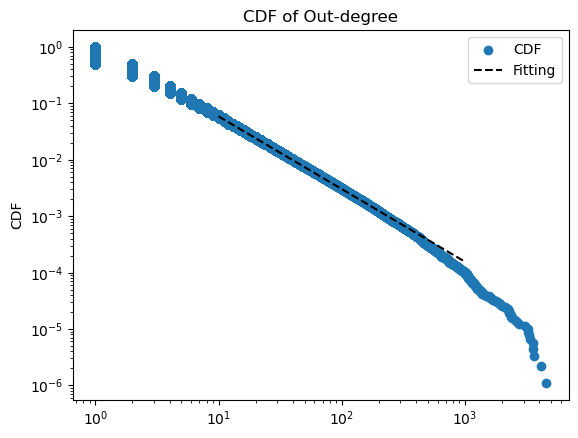

In [4]:
#cdf
x=np.sort(k_out)
y = np.arange(len(x), 0, -1) / len(x)

#fitting
fit=(x>=10) & (x<1000)
part_x = x[fit]
part_y = y[fit]
log_part_x = np.log(part_x)
log_part_y = np.log(part_y)
model = LinearRegression()
model.fit(log_part_x.reshape(-1,1), log_part_y)

x_fit = np.logspace(1, 3, 100)
y_fit = np.exp(model.intercept_) * np.power(x_fit,model.coef_[0])

plt.title("CDF of Out-degree")
plt.ylabel("CDF")
plt.xscale("log")
plt.yscale("log")
plt.scatter(x, y, label='CDF')
plt.plot(x_fit, y_fit, label='Fitting',ls="--", color='black')
plt.legend()
plt.savefig("PDA_230868_13_1.png")
plt.show()


In [5]:
gamma_data = -model.coef_[0]
gamma_data

1.2880290770014609